<a href="https://colab.research.google.com/github/gezmi/ColabDesign/blob/main/plmalign_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>1. Fast Start: Align all pairs between query & target</h1>

In [5]:
%%bash
git clone https://github.com/maovshao/PLMAlign.git

pip install fair-esm biopython


Cloning into 'PLMAlign'...


In [6]:
%cd PLMAlign

/content/PLMAlign/PLMAlign


In [7]:
%load_ext autoreload
%autoreload 2

# first edit the model path in embedding generate.py to Rostlab/prot_t5_xl_uniref50
# then run this cell
# this cell is to be able to edit the code and applying it without restarting the runtime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<H3>2.1 Generate embeddings</H3>

In [11]:
from plmalign.embedding_generate import esm_embedding_generate, prottrans_embedding_generate

query_fasta = 'example/query.fasta'
target_fasta = 'example/target.fasta'

#ESM-1b Embedding
query_embedding_path = 'example/query_esm_embedding/'
target_embedding_path = 'example/target_esm_embedding/'

#esm_embedding_generate(query_fasta, query_embedding_path)
#esm_embedding_generate(target_fasta, target_embedding_path)

#ProtT5 Embedding
query_embedding_path = 'example/query_t5_embedding/'
target_embedding_path = 'example/target_t5_embedding/'

prottrans_embedding_generate(query_fasta, query_embedding_path)
prottrans_embedding_generate(target_fasta, target_embedding_path)

Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################
########################################
Total number of sequences: 1
Average sequence length: 367.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

Embedded protein P0AD96 with length 367 to emb. of shape: torch.Size([367, 1024])

############# STATS #############
Total number of embeddings: 1
Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################


########################################
Total number of sequences: 5
Average sequence length: 330.6
Number of sequences >1022: 0


100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

Embedded protein P22768 with length 420 to emb. of shape: torch.Size([420, 1024])

############# STATS #############
Total number of embeddings: 5


{'P22768': tensor([[ 1.0952e-01, -1.2699e-01, -2.0553e-03,  ...,  1.4663e-01,
           4.0436e-03,  3.1096e-01],
         [ 1.3217e-02, -7.4873e-02,  1.4688e-01,  ..., -4.2054e-02,
           1.7233e-01,  2.2892e-01],
         [ 2.2816e-02, -3.6026e-04,  3.7234e-01,  ..., -9.3900e-02,
           3.4445e-01,  2.5699e-01],
         ...,
         [ 1.8210e-02,  2.4128e-01, -6.3118e-02,  ..., -9.1909e-02,
          -1.4618e-01,  1.3018e-01],
         [-1.5932e-01,  5.9697e-03,  2.2184e-01,  ..., -1.0124e-01,
          -8.5778e-02,  1.5755e-01],
         [-1.2461e-01,  1.0683e-01,  2.3168e-01,  ..., -5.1994e-02,
          -2.4646e-01,  1.0271e-01]]),
 'P15104': tensor([[ 0.1637, -0.0415, -0.1123,  ...,  0.2878,  0.0504,  0.2132],
         [-0.1606, -0.0283, -0.0152,  ...,  0.0510,  0.0083,  0.0291],
         [ 0.0362, -0.0620,  0.0210,  ...,  0.1527, -0.0543, -0.0997],
         ...,
         [-0.1089,  0.0438, -0.0948,  ..., -0.0839, -0.2940, -0.0812],
         [-0.1475, -0.0790,  0.2458,

In [12]:
from plmalign.embedding_generate import esm_embedding_generate, prottrans_embedding_generate

!echo -e ">ELMI000792\nQGRLDDFFKV" > example/ELMI000792.fasta
!echo -e ">DPOD3_HUMAN\nMADQLYLENIDEFVTDQNKIVTYKWLSYTLGVHVNQAKQMLYDYVERKRKENSGAQLHVTYLVSGSLIQNGHSCHKVAVVREDKLEAVKSKLAVTASIHVYSIQKAMLKDSGPLFNTDYDILKSNLQNCSKFSAIQCAAAVPRAPAESSSSSKKFEQSHLHMSSETQANNELTTNGHGPPASKQVSQQPKGIMGMFASKAAAKTQETNKETKTEAKEVTNASAAGNKAPGKGNMMSNFFGKAAMNKFKVNLDSEQAVKEEKIVEQPTVSVTEPKLATPAGLKKSSKKAEPVKVLQKEKKRGKRVALSDDETKETENMRKKRRRIKLPESDSSEDEVFPDSPGAYEAESPSPPPPPSPPLEPVPKTEPEPPSVKSSSGENKRKRKRVLKSKTYLDGEGCIVTEKVYESESCTDSEEELNMKTSSVHRPPAMTVKKEPREERKGPKKGTAALGKANRQVSITGFFQRK" > example/target_proteins.fasta
!echo -e ">DNMT1_HUMAN\nMPARTAPARVPTLAVPAISLPDDVRRRLKDLERDSLTEKECVKEKLNLLHEFLQTEIKNQLCDLETKLRKEELSEEGYLAKVKSLLNKDLSLENGAHAYNREVNGRLENGNQARSEARRVGMADANSPPKPLSKPRTPRRSKSDGEAKPEPSPSPRITRKSTRQTTITSHFAKGPAKRKPQEESERAKSDESIKEEDKDQDEKRRRVTSRERVARPLPAEEPERAKSGTRTEKEEERDEKEEKRLRSQTKEPTPKQKLKEEPDREARAGVQADEDEDGDEKDEKKHRSQPKDLAAKRRPEEKEPEKVNPQISDEKDEDEKEEKRRKTTPKEPTEKKMARAKTVMNSKTHPPKCIQCGQYLDDPDLKYGQHPPDAVDEPQMLTNEKLSIFDANESGFESYEALPQHKLTCFSVYCKHGHLCPIDTGLIEKNIELFFSGSAKPIYDDDPSLEGGVNGKNLGPINEWWITGFDGGEKALIGFSTSFAEYILMDPSPEYAPIFGLMQEKIYISKIVVEFLQSNSDSTYEDLINKIETTVPPSGLNLNRFTEDSLLRHAQFVVEQVESYDEAGDSDEQPIFLTPCMRDLIKLAGVTLGQRRAQARRQTIRHSTREKDRGPTKATTTKLVYQIFDTFFAEQIEKDDREDKENAFKRRRCGVCEVCQQPECGKCKACKDMVKFGGSGRSKQACQERRCPNMAMKEADDDEEVDDNIPEMPSPKKMHQGKKKKQNKNRISWVGEAVKTDGKKSYYKKVCIDAETLEVGDCVSVIPDDSSKPLYLARVTALWEDSSNGQMFHAHWFCAGTDTVLGATSDPLELFLVDECEDMQLSYIHSKVKVIYKAPSENWAMEGGMDPESLLEGDDGKTYFYQLWYDQDYARFESPPKTQPTEDNKFKFCVSCARLAEMRQKEIPRVLEQLEDLDSRVLYYSATKNGILYRVGDGVYLPPEAFTFNIKLSSPVKRPRKEPVDEDLYPEHYRKYSDYIKGSNLDAPEPYRIGRIKEIFCPKKSNGRPNETDIKIRVNKFYRPENTHKSTPASYHADINLLYWSDEEAVVDFKAVQGRCTVEYGEDLPECVQVYSMGGPNRFYFLEAYNAKSKSFEDPPNHARSPGNKGKGKGKGKGKPKSQACEPSEPEIEIKLPKLRTLDVFSGCGGLSEGFHQAGISDTLWAIEMWDPAAQAFRLNNPGSTVFTEDCNILLKLVMAGETTNSRGQRLPQKGDVEMLCGGPPCQGFSGMNRFNSRTYSKFKNSLVVSFLSYCDYYRPRFFLLENVRNFVSFKRSMVLKLTLRCLVRMGYQCTFGVLQAGQYGVAQTRRRAIILAAAPGEKLPLFPEPLHVFAPRACQLSVVVDDKKFVSNITRLSSGPFRTITVRDTMSDLPEVRNGASALEISYNGEPQSWFQRQLRGAQYQPILRDHICKDMSALVAARMRHIPLAPGSDWRDLPNIEVRLSDGTMARKLRYTHHDRKNGRSSSGALRGVCSCVEAGKACDPAARQFNTLIPWCLPHTGNRHNHWAGLYGRLEWDGFFSTTVTNPEPMGKQGRVLHPEQHRVVSVRECARSQGFPDTYRLFGNILDKHRQVGNAVPPPLAKAIGLEIKLCMLAKARESASAKIKEEEAAKD" >> example/target_proteins.fasta
!echo -e ">CYC_HUMAN\nMGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE" >> example/target_proteins.fasta
!echo -e ">PRR7_HUMAN\nMVMSQGTYTFLTCFAGFWLIWGLIVLLCCFCSFLRRRLKRRQEERLREQNLRALELEPLELEGSLAGSPPGLAPPQPPPHRSRLEAPAHAHSHPHVHVHPLLHHGPAQPHAHAHPHPHHHALPHPPPTHLSVPPRPWSYPRQAESDMSKPPCYEEAVLMAEPPPPYSEVLTDTRGLYRKIVTPFLSRRDSAEKQEQPPPSYKPLFLDRGYTSALHLPSAPRPAPPCPALCLQADRGRRVFPSWTDSELSSREPLEHGAWRLPVSIPLFGRTTAV" >> example/target_proteins.fasta
!echo -e ">PRR7_HUMAN\nMVMSQGTYTFLTCFAGFWLIWGLIVLLCCFCSFLRRRLKRRQEERLREQNLRALELEPLELEGSLAGSPPGLAPPQPPPHRSRLEAPAHAHSHPHVHVHPLLHHGPAQPHAHAHPHPHHHALPHPPPTHLSVPPRPWSYPRQAESDMSKPPCYEEAVLMAEPPPPYSEVLTDTRGLYRKIVTPFLSRRDSAEKQEQPPPSYKPLFLDRGYTSALHLPSAPRPAPPCPALCLQADRGRRVFPSWTDSELSSREPLEHGAWRLPVSIPLFGRTTAV" >> example/PRR7_HUMAN.fasta
!echo -e ">BTK_HUMAN\nMAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFERGRRGSKKGSIDVEKITCVETVVPEKNPPPERQIPRRGEESSEMEQISIIERFPYPFQVVYDEGPLYVFSPTEELRKRWIHQLKNVIRYNSDLVQKYHPCFWIDGQYLCCSQTAKNAMGCQILENRNGSLKPGSSHRKTKKPLPPTPEEDQILKKPLPPEPAAAPVSTSELKKVVALYDYMPMNANDLQLRKGDEYFILEESNLPWWRARDKNGQEGYIPSNYVTEAEDSIEMYEWYSKHMTRSQAEQLLKQEGKEGGFIVRDSSKAGKYTVSVFAKSTGDPQGVIRHYVVCSTPQSQYYLAEKHLFSTIPELINYHQHNSAGLISRLKYPVSQQNKNAPSTAGLGYGSWEIDPKDLTFLKELGTGQFGVVKYGKWRGQYDVAIKMIKEGSMSEDEFIEEAKVMMNLSHEKLVQLYGVCTKQRPIFIITEYMANGCLLNYLREMRHRFQTQQLLEMCKDVCEAMEYLESKQFLHRDLAARNCLVNDQGVVKVSDFGLSRYVLDDEYTSSVGSKFPVRWSPPEVLMYSKFSSKSDIWAFGVLMWEIYSLGKMPYERFTNSETAEHIAQGLRLYRPHLASEKVYTIMYSCWHEKADERPTFKILLSNILDVMDEES" > example/BTK_HUMAN.fasta


query_fasta = 'example/ELMI000792.fasta'
target_fasta = 'example/PRR7_HUMAN.fasta'

#ESM-1b Embedding
query_embedding_path = 'example/query_esm_embedding_motif/'
target_embedding_path = 'example/target_esm_embedding_protein/'

#esm_embedding_generate(query_fasta, query_embedding_path)
#esm_embedding_generate(target_fasta, target_embedding_path)

#ProtT5 Embedding
query_embedding_path = 'example/query_t5_embedding_motif/'
target_embedding_path = 'example/target_t5_embedding_protein/'

prottrans_embedding_generate(query_fasta, query_embedding_path)
prottrans_embedding_generate(target_fasta, target_embedding_path)

Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################
########################################
Total number of sequences: 1
Average sequence length: 10.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

Embedded protein ELMI000792 with length 10 to emb. of shape: torch.Size([10, 1024])

############# STATS #############
Total number of embeddings: 1
Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################


########################################
Total number of sequences: 1
Average sequence length: 274.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

Embedded protein PRR7_HUMAN with length 274 to emb. of shape: torch.Size([274, 1024])

############# STATS #############
Total number of embeddings: 1


{'PRR7_HUMAN': tensor([[ 0.2468, -0.2218,  0.0797,  ..., -0.1897, -0.0323,  0.2473],
         [ 0.1135, -0.2082,  0.0815,  ..., -0.0913, -0.0862,  0.1893],
         [-0.0305, -0.1597,  0.2839,  ..., -0.1539,  0.1915,  0.1916],
         ...,
         [ 0.2949, -0.0689,  0.3173,  ..., -0.1405,  0.3229, -0.3011],
         [-0.1025, -0.0387,  0.1212,  ..., -0.0632,  0.2047, -0.0046],
         [-0.0231, -0.0603,  0.1702,  ...,  0.0545, -0.1105, -0.5523]])}

## First try, with default code, on LIG_SH3_1

In [19]:
from plmalign.plmalign import *
!echo -e ">ELMI000175\nVAVVRTPPKSPSSAK" > example/ELMI000175.fasta
!echo -e ">BTK_HUMAN\nMAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFERGRRGSKKGSIDVEKITCVETVVPEKNPPPERQIPRRGEESSEMEQISIIERFPYPFQVVYDEGPLYVFSPTEELRKRWIHQLKNVIRYNSDLVQKYHPCFWIDGQYLCCSQTAKNAMGCQILENRNGSLKPGSSHRKTKKPLPPTPEEDQILKKPLPPEPAAAPVSTSELKKVVALYDYMPMNANDLQLRKGDEYFILEESNLPWWRARDKNGQEGYIPSNYVTEAEDSIEMYEWYSKHMTRSQAEQLLKQEGKEGGFIVRDSSKAGKYTVSVFAKSTGDPQGVIRHYVVCSTPQSQYYLAEKHLFSTIPELINYHQHNSAGLISRLKYPVSQQNKNAPSTAGLGYGSWEIDPKDLTFLKELGTGQFGVVKYGKWRGQYDVAIKMIKEGSMSEDEFIEEAKVMMNLSHEKLVQLYGVCTKQRPIFIITEYMANGCLLNYLREMRHRFQTQQLLEMCKDVCEAMEYLESKQFLHRDLAARNCLVNDQGVVKVSDFGLSRYVLDDEYTSSVGSKFPVRWSPPEVLMYSKFSSKSDIWAFGVLMWEIYSLGKMPYERFTNSETAEHIAQGLRLYRPHLASEKVYTIMYSCWHEKADERPTFKILLSNILDVMDEES" > example/BTK_HUMAN.fasta


query_fasta = 'example/ELMI000175.fasta'
target_fasta = 'example/BTK_HUMAN.fasta'

_, query_sequences = read_fasta(query_fasta)
_, target_sequences = read_fasta(target_fasta)
output_path = 'example/output_motif_sh3/'


query_embedding_path = 'example/query_t5_embedding_motif/'
target_embedding_path = 'example/target_t5_embedding_protein/'


query_embeddings = prottrans_embedding_generate(query_fasta, query_embedding_path)
target_embeddings = prottrans_embedding_generate(target_fasta, target_embedding_path)

for single_query in tqdm(query_sequences, desc="Query"):
  print(single_query)
  for single_target in target_sequences:
    print('\n')
    print(single_target)
    score, results = pairwise_align(query_embeddings[single_query], target_embeddings[single_target], query_sequences[single_query], target_sequences[single_target], 'local', method = 'plmalign')
    print(results, score)

Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################
########################################
Total number of sequences: 1
Average sequence length: 15.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:00<00:00, 18.18it/s]

Embedded protein ELMI000175 with length 15 to emb. of shape: torch.Size([15, 1024])

############# STATS #############
Total number of embeddings: 1
Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################


########################################
Total number of sequences: 1
Average sequence length: 659.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


Embedded protein BTK_HUMAN with length 659 to emb. of shape: torch.Size([659, 1024])

############# STATS #############
Total number of embeddings: 1


Query: 100%|██████████| 1/1 [00:00<00:00, 102.09it/s]

ELMI000175


BTK_HUMAN
V---A-VVRTPP--KSPSSAK
|     |||||   |||||||
PEED-QILKKP-LPPEPAAAP 3.9687182903289795


The result of BTK & LIG_SH3_1 does not look very good, but BTK has 2 motifs very near each other (186-186 & 200-206). This is expected to throw off alignment.

## Trying with random proline-rich protein (PRR7)  - we do NOT know if this contains an SH3 binding site

In [20]:
from plmalign.plmalign import *
query_fasta = 'example/ELMI000175.fasta'
target_fasta = 'example/PRR7_HUMAN.fasta'

!echo -e ">ELMI000175\nRTPPKSP" > example/ELMI000175.fasta
prottrans_embedding_generate(query_fasta, query_embedding_path)

_, query_sequences = read_fasta(query_fasta)
_, target_sequences = read_fasta(target_fasta)
output_path = 'example/output_motif_sh3/'


query_embedding_path = 'example/query_t5_embedding_motif/'
target_embedding_path = 'example/target_t5_embedding_protein/'

query_embeddings = embedding_load(query_fasta, query_embedding_path)
target_embeddings = embedding_load(target_fasta, target_embedding_path)

for single_query in tqdm(query_sequences, desc="Query"):
  print(single_query)
  for single_target in target_sequences:
    print('\n')
    print(single_target)
    score, results = pairwise_align(query_embeddings[single_query], target_embeddings[single_target], query_sequences[single_query], target_sequences[single_target], method = 'plmalign', mode='local')
    print(results, score)

Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################
########################################
Total number of sequences: 1
Average sequence length: 7.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:00<00:00, 20.34it/s]


Embedded protein ELMI000175 with length 7 to emb. of shape: torch.Size([7, 1024])

############# STATS #############
Total number of embeddings: 1


Query: 100%|██████████| 1/1 [00:00<00:00, 148.45it/s]

ELMI000175


PRR7_HUMAN
R-TPP-----KSP
| |||     |||
AGSPPGLAPPQPP 5.311096668243408


## Going deeper - several motifs in the same protein requires alignment method with several possible alignments

### First, against BTK again

In [23]:
extr = plmalign()
extr.MODE = 'local'
print(single_query)
single_query_btk = 'ELMI000175'
single_target_btk = 'BTK_HUMAN'
query_embeddings_btk = embedding_load('example/ELMI000175.fasta', 'example/query_t5_embedding_motif/')
target_embeddings_btk = embedding_load('example/BTK_HUMAN.fasta', 'example/target_t5_embedding_protein/')
results_btk = extr.embedding_to_span(query_embeddings_btk[single_query_btk], target_embeddings_btk[single_target_btk], result_mode='all')

ELMI000175


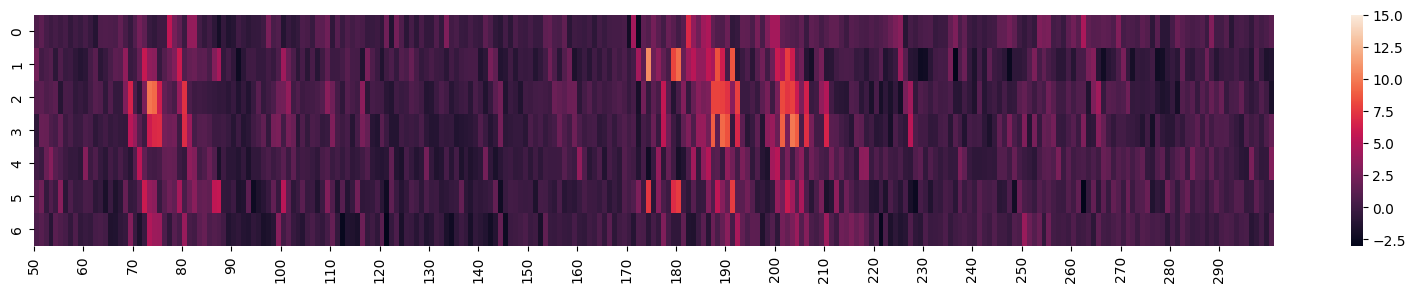

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
start_btk = 50
end_btk = 300

fig = sns.heatmap(results_btk[1][(start_btk-1):end_btk,:].T, vmin=-3, vmax=15)
# change the ratio of the figure
fig.figure.set_size_inches(20, 3)
# add x axis ticks from 180 to 211 and make them turn 90 degrees
fig.set_xticks(range(0, end_btk-start_btk, 10))
fig.set_xticklabels(range(start_btk, end_btk, 10), rotation=90)
plt.show()

### As by AF2 prediction the possible motif between 70-80 is reversed, also reversing the target embedding

torch.Size([7, 1024])


<ipython-input-26-8e06f658abdc>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(round(extr.embedding_to_span(query_embeddings_btk[single_query_btk], target_embeddings_btk[single_target_btk][i:i+8, :])['score'], 2))
<ipython-input-26-8e06f658abdc>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(round(extr.embedding_to_span(query_embeddings_btk[single_query_btk], reversed_target_embeddings[i:i+8, :])['score'], 2))


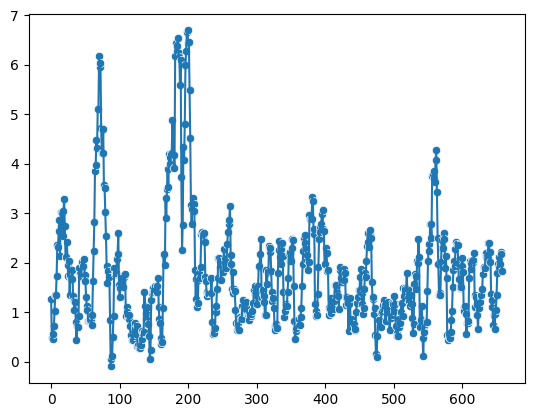

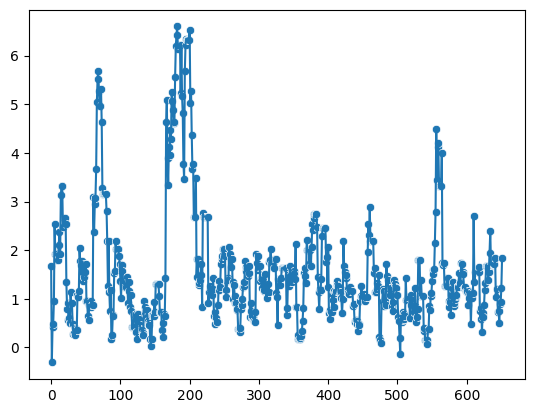

In [26]:
import torch
# loop through the target embedding with a sliding window, and make the alignment against every window with length=10
print(query_embeddings_btk[single_query_btk].shape)
scores_btk = [
    float(round(extr.embedding_to_span(query_embeddings_btk[single_query_btk], target_embeddings_btk[single_target_btk][i:i+8, :])['score'], 2))
    for i in range(target_embeddings_btk[single_target_btk].shape[0])
]

# Reverse the entire target_embeddings_btk array for single_target_btk first
reversed_target_embeddings = torch.flip(target_embeddings_btk[single_target_btk], dims=[0])

# Now calculate scores using the reversed embeddings
scores_back_btk = [
    float(round(extr.embedding_to_span(query_embeddings_btk[single_query_btk], reversed_target_embeddings[i:i+8, :])['score'], 2))
    for i in range(reversed_target_embeddings.shape[0] - 7)  # Ensure no out-of-bounds error
]
# reverse the scores back
scores_back_btk = scores_back_btk[::-1]

sns.scatterplot(x=range(len(scores_btk)), y=scores_btk)
# add line to connect the dots
plt.plot(range(len(scores_btk)), scores_btk)
plt.show()

sns.scatterplot(x=range(len(scores_back_btk)), y=scores_back_btk)
# add line to connect the dots
plt.plot(range(len(scores_back_btk)), scores_back_btk)
plt.show()

Conclusion: Reversing does really help in finding such motifs

### Trying on PRR7 again - harder target because of P-rich region

In [27]:
from plmalign.plmalign import *
query_fasta = 'example/ELMI000175.fasta'
target_fasta = 'example/PRR7_HUMAN.fasta'
_, query_sequences = read_fasta(query_fasta)
_, target_sequences = read_fasta(target_fasta)
output_path = 'example/output_motif_sh3/'

query_embedding_path = 'example/query_t5_embedding_motif/'
target_embedding_path = 'example/target_t5_embedding_protein/'

query_embeddings = embedding_load(query_fasta, query_embedding_path)
target_embeddings = embedding_load(target_fasta, target_embedding_path)

for single_query in tqdm(query_sequences, desc="Query"):
  print(single_query)
  for single_target in target_sequences:
    print('\n')
    print(single_query)
    print(single_target)
    score, results = pairwise_align(query_embeddings[single_query], target_embeddings[single_target], query_sequences[single_query], target_sequences[single_target], method = 'plmalign', mode='local')
    print(results, score)

Query: 100%|██████████| 1/1 [00:00<00:00, 122.13it/s]

ELMI000175


ELMI000175
PRR7_HUMAN
R-TPP-----KSP
| |||     |||
AGSPPGLAPPQPP 5.311096668243408


In [28]:
extr = plmalign()
extr.MODE = 'local'
print(single_query)
results = extr.embedding_to_span(query_embeddings[single_query], target_embeddings[single_target], result_mode='all')

ELMI000175


Query: ELMI000175 Target: PRR7_HUMAN


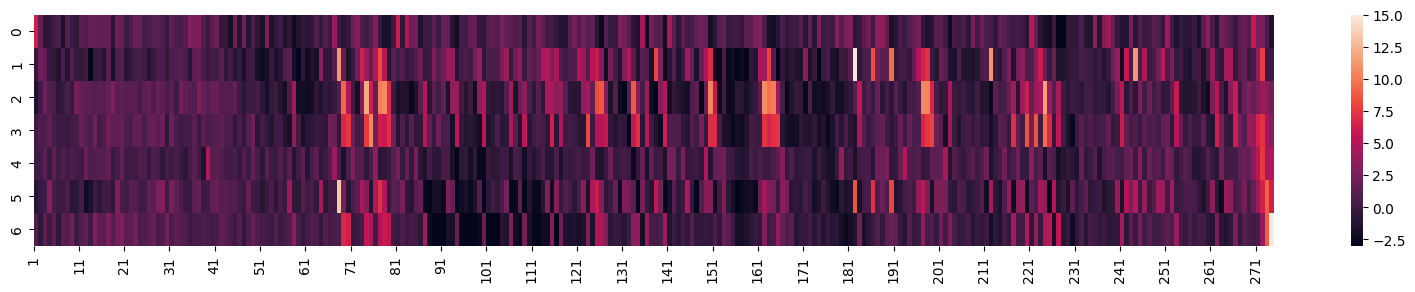

In [29]:
print(f'Query: {single_query}', f'Target: {single_target}')
start = 1
end = target_embeddings[single_target].shape[0]

# change the ratio of the figure
fig = sns.heatmap(results[1][(start-1):end,:].T, vmin=-3, vmax=15)
fig.figure.set_size_inches(20, 3)

# add x axis ticks from 180 to 211 and make them turn 90 degrees
fig.set_xticks(range(0, end-start, 10))
fig.set_xticklabels(range(start, end, 10), rotation=90)

plt.show()

274
TPPKSP
| ||||
P-GLAP 6 70 

RTPPKSP
| |||||
G-LAPPQ 7 71 

RTPPKSP
|||||||
LAPPQPP 7 72 

R-TPPKS
| |||||
APPQPPP 6 73 

R--TP-PKS
|      ||
PPP--P-YS 6 162 

TPPK---SP
| |    ||
F-G-RTTAV 6 268 



<Axes: >

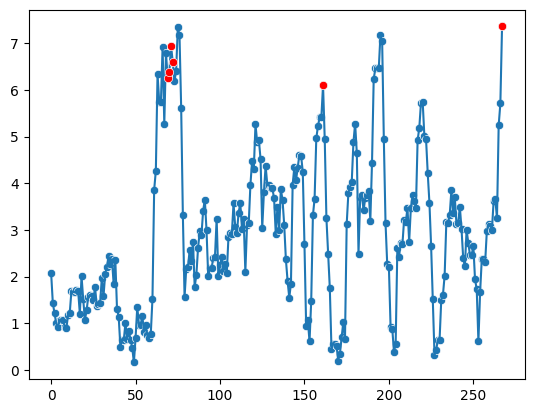

In [30]:
# loop through the target embedding with a sliding window, and make the alignment against every window
seq1 = query_sequences[single_query]
prr7_seq = 'MVMSQGTYTFLTCFAGFWLIWGLIVLLCCFCSFLRRRLKRRQEERLREQNLRALELEPLELEGSLAGSPPGLAPPQPPPHRSRLEAPAHAHSHPHVHVHPLLHHGPAQPHAHAHPHPHHHALPHPPPTHLSVPPRPWSYPRQAESDMSKPPCYEEAVLMAEPPPPYSEVLTDTRGLYRKIVTPFLSRRDSAEKQEQPPPSYKPLFLDRGYTSALHLPSAPRPAPPCPALCLQADRGRRVFPSWTDSELSSREPLEHGAWRLPVSIPLFGRTTAV'

scores = []
scores_long = []
print(target_embeddings[single_target].shape[0])
for i in range(0, target_embeddings[single_target].shape[0] - len(seq1) + 1):
  seq2 = prr7_seq[i:i+len(seq1)]

  results = extr.embedding_to_span(query_embeddings[single_query], target_embeddings[single_target][i:i+len(seq1), :],
                                   result_mode='all')
  row = results[0]

  score = float(round(row['score'].item(), 2))
  scores.append(score)

  # There are several parts with good score, but not all of them aligns to the whole motif
  if score > 6:
    aln = draw_alignment(row.indices.to_list()[0], seq1, seq2, output='str')
    query_len = len(aln.split('\n')[0].replace('-', ''))
    if query_len > (len(seq1) - 2):
      print(aln, query_len, i+1, '\n')
      scores_long.append(score)
    else:
      scores_long.append(None)
  else:
    scores_long.append(None)


plt.plot(range(len(scores)), scores)
sns.scatterplot(x=range(len(scores)), y=scores)
sns.scatterplot(x=range(len(scores_long)), y=scores_long, color='red', zorder=3)
# add line to connect the dots

Red: score > 6 and alignment query length > query length -2

### Doing the same for BTK, which definitely contains more motifs

TPP-KSP-
|   |   
K--TK--K 6 183 

RTP-PKS-P
|   |    
T--KK--P- 7 184 

RT-PPK-SP-
|  |    | 
K-KP--L-PP 7 185 

R-T-PP-KS-P
|       | |
KP-L--P-PTP 7 186 

R-T-P-PK-S
|      | |
PL-P-P-TPE 6 187 

RTP-PKS-P
|   |    
L--KK--P- 7 198 

RT-PPK-S
|  |    
K-KP--L- 6 199 



<Axes: >

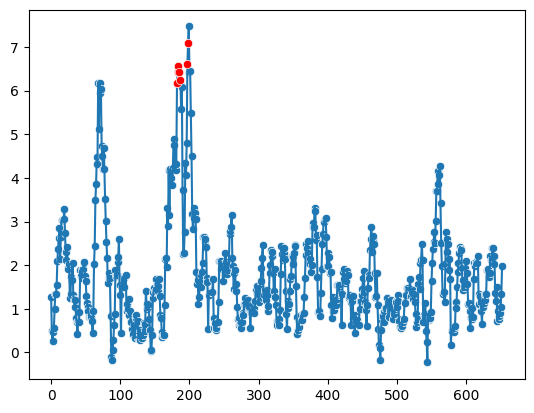

In [31]:
# loop through the target embedding with a sliding window, and make the alignment against every window with length=10
seq1 = query_sequences[single_query]
btk_seq = 'MAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFERGRRGSKKGSIDVEKITCVETVVPEKNPPPERQIPRRGEESSEMEQISIIERFPYPFQVVYDEGPLYVFSPTEELRKRWIHQLKNVIRYNSDLVQKYHPCFWIDGQYLCCSQTAKNAMGCQILENRNGSLKPGSSHRKTKKPLPPTPEEDQILKKPLPPEPAAAPVSTSELKKVVALYDYMPMNANDLQLRKGDEYFILEESNLPWWRARDKNGQEGYIPSNYVTEAEDSIEMYEWYSKHMTRSQAEQLLKQEGKEGGFIVRDSSKAGKYTVSVFAKSTGDPQGVIRHYVVCSTPQSQYYLAEKHLFSTIPELINYHQHNSAGLISRLKYPVSQQNKNAPSTAGLGYGSWEIDPKDLTFLKELGTGQFGVVKYGKWRGQYDVAIKMIKEGSMSEDEFIEEAKVMMNLSHEKLVQLYGVCTKQRPIFIITEYMANGCLLNYLREMRHRFQTQQLLEMCKDVCEAMEYLESKQFLHRDLAARNCLVNDQGVVKVSDFGLSRYVLDDEYTSSVGSKFPVRWSPPEVLMYSKFSSKSDIWAFGVLMWEIYSLGKMPYERFTNSETAEHIAQGLRLYRPHLASEKVYTIMYSCWHEKADERPTFKILLSNILDVMDEES'

scores_btk = []
scores_long_btk = []
for i in range(0, target_embeddings_btk[single_target_btk].shape[0] - len(seq1) + 1):
  seq2 = btk_seq[i:i+len(seq1)]

  results = extr.embedding_to_span(query_embeddings_btk[single_query_btk], target_embeddings_btk[single_target_btk][i:i+len(seq1), :],
                                   result_mode='all')
  row = results[0]

  score = float(round(row['score'].item(), 2))
  scores_btk.append(score)

  if score > 6:
    aln = draw_alignment(row.indices.to_list()[0], seq1, seq2, output='str')
    query_len = len(aln.split('\n')[0].replace('-', ''))
    if query_len > (len(seq1) - 2):
      print(aln, query_len, i+1, '\n')
      scores_long_btk.append(score)
    else:
      scores_long_btk.append(None)
  else:
    scores_long_btk.append(None)


plt.plot(range(len(scores_btk)), scores_btk)
sns.scatterplot(x=range(len(scores_btk)), y=scores_btk)
sns.scatterplot(x=range(len(scores_long_btk)), y=scores_long_btk, color='red', zorder=3)

The expected motif regions has the highest score, although the alignment is not perfect

### Also do the reverse search

PK-SP-
||    
APE--P 4 208 

PP-KS-P
||    |
PEP--PL 5 207 

TP-PK-S
||    |
EPP--LP 5 206 

RT-PP-K
||    |
PPL--PK 5 205 

R--TP-P
|     |
PLP--KK 4 204 

R-T-P
| | |
LPKKL 3 203 

PKSP
||||
DEEP 4 196 

PPKS
||||
EEPT 4 195 

TPPK
||||
EPTP 4 194 

RTPP
||||
PTPP 4 193 

R-TP
| ||
TPPL 3 192 

RTP-P-K
||    |
PP-L-PK 5 191 

R-T-P-P
|     |
PL-P-KK 4 190 

R-T-P
| | |
LPKKT 3 189 



<Axes: >

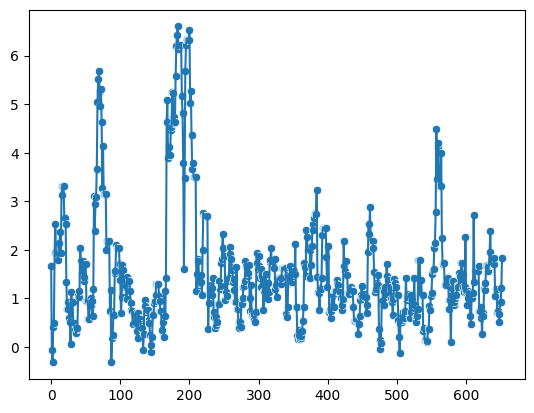

In [32]:
# loop through the target embedding with a sliding window, and make the alignment against every window with length=10
seq1 = query_sequences[single_query]
btk_seq = 'MAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFERGRRGSKKGSIDVEKITCVETVVPEKNPPPERQIPRRGEESSEMEQISIIERFPYPFQVVYDEGPLYVFSPTEELRKRWIHQLKNVIRYNSDLVQKYHPCFWIDGQYLCCSQTAKNAMGCQILENRNGSLKPGSSHRKTKKPLPPTPEEDQILKKPLPPEPAAAPVSTSELKKVVALYDYMPMNANDLQLRKGDEYFILEESNLPWWRARDKNGQEGYIPSNYVTEAEDSIEMYEWYSKHMTRSQAEQLLKQEGKEGGFIVRDSSKAGKYTVSVFAKSTGDPQGVIRHYVVCSTPQSQYYLAEKHLFSTIPELINYHQHNSAGLISRLKYPVSQQNKNAPSTAGLGYGSWEIDPKDLTFLKELGTGQFGVVKYGKWRGQYDVAIKMIKEGSMSEDEFIEEAKVMMNLSHEKLVQLYGVCTKQRPIFIITEYMANGCLLNYLREMRHRFQTQQLLEMCKDVCEAMEYLESKQFLHRDLAARNCLVNDQGVVKVSDFGLSRYVLDDEYTSSVGSKFPVRWSPPEVLMYSKFSSKSDIWAFGVLMWEIYSLGKMPYERFTNSETAEHIAQGLRLYRPHLASEKVYTIMYSCWHEKADERPTFKILLSNILDVMDEES'
btk_seq_rev = btk_seq[::-1]

scores_btk_rev = []
scores_long_btk_rev = []
target_embeddings_btk_rev = {}
target_embeddings_btk_rev[single_target_btk] = torch.flip(target_embeddings_btk[single_target_btk], dims=[0])
for i in range(0, target_embeddings_btk[single_target_btk].shape[0] - len(seq1) + 1):
  seq2 = btk_seq_rev[i:i+len(seq1)]

  results = extr.embedding_to_span(query_embeddings_btk[single_query_btk], target_embeddings_btk_rev[single_target_btk][i:i+len(seq1), :],
                                   result_mode='all')
  row = results[0]

  score = float(round(row['score'].item(), 2))
  scores_btk_rev.append(score)

  if score > 6:
    aln = draw_alignment(row.indices.to_list()[0], seq1, seq2, output='str')
    query_len = len(aln.split('\n')[0].replace('-', ''))
    print(aln, query_len, len(btk_seq)-i+1, '\n')
    if query_len > (len(seq1) - 2):
      print(aln, query_len, len(btk_seq)-i+1, '\n')
      scores_long_btk_rev.append(score)
    else:
      scores_long_btk_rev.append(None)
  else:
    scores_long_btk_rev.append(None)

# reverse scores
scores_btk_rev = scores_btk_rev[::-1]
scores_long_btk_rev = scores_long_btk_rev[::-1]

plt.plot(range(len(scores_btk_rev)), scores_btk_rev)
sns.scatterplot(x=range(len(scores_btk_rev)), y=scores_btk_rev)
sns.scatterplot(x=range(len(scores_btk_rev)), y=scores_long_btk_rev, color='red', zorder=3)

## Simple example: PCNA motif

In [34]:
!echo -e ">ELMI000792\nQGRLDDFFKV" > example/ELMI000792.fasta
!echo -e ">DPOD3_HUMAN\nMADQLYLENIDEFVTDQNKIVTYKWLSYTLGVHVNQAKQMLYDYVERKRKENSGAQLHVTYLVSGSLIQNGHSCHKVAVVREDKLEAVKSKLAVTASIHVYSIQKAMLKDSGPLFNTDYDILKSNLQNCSKFSAIQCAAAVPRAPAESSSSSKKFEQSHLHMSSETQANNELTTNGHGPPASKQVSQQPKGIMGMFASKAAAKTQETNKETKTEAKEVTNASAAGNKAPGKGNMMSNFFGKAAMNKFKVNLDSEQAVKEEKIVEQPTVSVTEPKLATPAGLKKSSKKAEPVKVLQKEKKRGKRVALSDDETKETENMRKKRRRIKLPESDSSEDEVFPDSPGAYEAESPSPPPPPSPPLEPVPKTEPEPPSVKSSSGENKRKRKRVLKSKTYLDGEGCIVTEKVYESESCTDSEEELNMKTSSVHRPPAMTVKKEPREERKGPKKGTAALGKANRQVSITGFFQRK" > example/target_proteins.fasta
!echo -e ">DPOD3_HUMAN\nMADQLYLENIDEFVTDQNKIVTYKWLSYTLGVHVNQAKQMLYDYVERKRKENSGAQLHVTYLVSGSLIQNGHSCHKVAVVREDKLEAVKSKLAVTASIHVYSIQKAMLKDSGPLFNTDYDILKSNLQNCSKFSAIQCAAAVPRAPAESSSSSKKFEQSHLHMSSETQANNELTTNGHGPPASKQVSQQPKGIMGMFASKAAAKTQETNKETKTEAKEVTNASAAGNKAPGKGNMMSNFFGKAAMNKFKVNLDSEQAVKEEKIVEQPTVSVTEPKLATPAGLKKSSKKAEPVKVLQKEKKRGKRVALSDDETKETENMRKKRRRIKLPESDSSEDEVFPDSPGAYEAESPSPPPPPSPPLEPVPKTEPEPPSVKSSSGENKRKRKRVLKSKTYLDGEGCIVTEKVYESESCTDSEEELNMKTSSVHRPPAMTVKKEPREERKGPKKGTAALGKANRQVSITGFFQRK" > example/DPOD3_HUMAN.fasta
!echo -e ">DNMT1_HUMAN\nMPARTAPARVPTLAVPAISLPDDVRRRLKDLERDSLTEKECVKEKLNLLHEFLQTEIKNQLCDLETKLRKEELSEEGYLAKVKSLLNKDLSLENGAHAYNREVNGRLENGNQARSEARRVGMADANSPPKPLSKPRTPRRSKSDGEAKPEPSPSPRITRKSTRQTTITSHFAKGPAKRKPQEESERAKSDESIKEEDKDQDEKRRRVTSRERVARPLPAEEPERAKSGTRTEKEEERDEKEEKRLRSQTKEPTPKQKLKEEPDREARAGVQADEDEDGDEKDEKKHRSQPKDLAAKRRPEEKEPEKVNPQISDEKDEDEKEEKRRKTTPKEPTEKKMARAKTVMNSKTHPPKCIQCGQYLDDPDLKYGQHPPDAVDEPQMLTNEKLSIFDANESGFESYEALPQHKLTCFSVYCKHGHLCPIDTGLIEKNIELFFSGSAKPIYDDDPSLEGGVNGKNLGPINEWWITGFDGGEKALIGFSTSFAEYILMDPSPEYAPIFGLMQEKIYISKIVVEFLQSNSDSTYEDLINKIETTVPPSGLNLNRFTEDSLLRHAQFVVEQVESYDEAGDSDEQPIFLTPCMRDLIKLAGVTLGQRRAQARRQTIRHSTREKDRGPTKATTTKLVYQIFDTFFAEQIEKDDREDKENAFKRRRCGVCEVCQQPECGKCKACKDMVKFGGSGRSKQACQERRCPNMAMKEADDDEEVDDNIPEMPSPKKMHQGKKKKQNKNRISWVGEAVKTDGKKSYYKKVCIDAETLEVGDCVSVIPDDSSKPLYLARVTALWEDSSNGQMFHAHWFCAGTDTVLGATSDPLELFLVDECEDMQLSYIHSKVKVIYKAPSENWAMEGGMDPESLLEGDDGKTYFYQLWYDQDYARFESPPKTQPTEDNKFKFCVSCARLAEMRQKEIPRVLEQLEDLDSRVLYYSATKNGILYRVGDGVYLPPEAFTFNIKLSSPVKRPRKEPVDEDLYPEHYRKYSDYIKGSNLDAPEPYRIGRIKEIFCPKKSNGRPNETDIKIRVNKFYRPENTHKSTPASYHADINLLYWSDEEAVVDFKAVQGRCTVEYGEDLPECVQVYSMGGPNRFYFLEAYNAKSKSFEDPPNHARSPGNKGKGKGKGKGKPKSQACEPSEPEIEIKLPKLRTLDVFSGCGGLSEGFHQAGISDTLWAIEMWDPAAQAFRLNNPGSTVFTEDCNILLKLVMAGETTNSRGQRLPQKGDVEMLCGGPPCQGFSGMNRFNSRTYSKFKNSLVVSFLSYCDYYRPRFFLLENVRNFVSFKRSMVLKLTLRCLVRMGYQCTFGVLQAGQYGVAQTRRRAIILAAAPGEKLPLFPEPLHVFAPRACQLSVVVDDKKFVSNITRLSSGPFRTITVRDTMSDLPEVRNGASALEISYNGEPQSWFQRQLRGAQYQPILRDHICKDMSALVAARMRHIPLAPGSDWRDLPNIEVRLSDGTMARKLRYTHHDRKNGRSSSGALRGVCSCVEAGKACDPAARQFNTLIPWCLPHTGNRHNHWAGLYGRLEWDGFFSTTVTNPEPMGKQGRVLHPEQHRVVSVRECARSQGFPDTYRLFGNILDKHRQVGNAVPPPLAKAIGLEIKLCMLAKARESASAKIKEEEAAKD" >> example/target_proteins.fasta
!echo -e ">CYC_HUMAN\nMGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE" >> example/target_proteins.fasta


query_fasta = 'example/ELMI000792.fasta'
target_fasta = 'example/DPOD3_HUMAN.fasta'

#ESM-1b Embedding
query_embedding_path = 'example/query_esm_embedding_motif/'
target_embedding_path = 'example/target_esm_embedding_protein/'

#esm_embedding_generate(query_fasta, query_embedding_path)
#esm_embedding_generate(target_fasta, target_embedding_path)

#ProtT5 Embedding
query_embedding_path = 'example/query_t5_embedding_motif/'
target_embedding_path = 'example/target_t5_embedding_protein/'

query_embeddings_pcna = prottrans_embedding_generate(query_fasta)
target_embeddings_pcna = prottrans_embedding_generate(target_fasta)

Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################
########################################
Total number of sequences: 1
Average sequence length: 10.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:00<00:00, 16.92it/s]

Embedded protein ELMI000792 with length 10 to emb. of shape: torch.Size([10, 1024])

############# STATS #############
Total number of embeddings: 1
Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################


########################################
Total number of sequences: 1
Average sequence length: 466.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Embedded protein DPOD3_HUMAN with length 466 to emb. of shape: torch.Size([466, 1024])

############# STATS #############
Total number of embeddings: 1


In [35]:
plmalign_pipeline('example/ELMI000792.fasta', 'example/target_proteins.fasta', mode='local')

Align with method: plmalign
Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################
########################################
Total number of sequences: 1
Average sequence length: 10.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:00<00:00, 16.83it/s]

Embedded protein ELMI000792 with length 10 to emb. of shape: torch.Size([10, 1024])

############# STATS #############
Total number of embeddings: 1
Using device: cuda:0
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################


########################################
Total number of sequences: 3
Average sequence length: 729.0
Number of sequences >1022: 1


100%|██████████| 3/3 [00:02<00:00,  1.05it/s]


Embedded protein DNMT1_HUMAN with length 1022 to emb. of shape: torch.Size([1022, 1024])

############# STATS #############
Total number of embeddings: 3


Query: 100%|██████████| 1/1 [00:00<00:00, 67.95it/s]

ELMI000792	DPOD3_HUMAN	 Score = 13.170121192932129

ELMI000792	DPOD3_HUMAN
Q----------------GRLDDFFK-V-
|                ||||||||   
RKGPKKGTAALGKANRQVSITGFFQR-K

ELMI000792	DNMT1_HUMAN	 Score = 10.304052352905273

ELMI000792	DNMT1_HUMAN
Q-------------GRLDDF-FK-V-
|             ||||||  |   
PSPSPRITRKSTRQTTITSHF-AK-G

ELMI000792	CYC_HUMAN	 Score = 4.056053638458252

ELMI000792	CYC_HUMAN
Q-G---RLDDFFKV----
|     ||||||||    
KE-ERADLIAYLKKATNE



In [36]:
single_target_pcna = 'DPOD3_HUMAN'
single_query_pcna = 'ELMI000792'
extr = plmalign()
extr.MODE = 'local'
results_pcna = extr.embedding_to_span(query_embeddings_pcna[single_query_pcna], target_embeddings_pcna[single_target_pcna], result_mode='all')

1 466
(466, 10)
(466, 10)


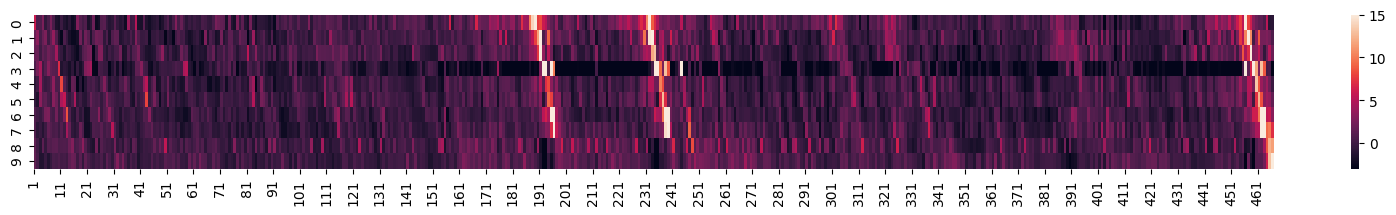

In [37]:
start_pcna = 1
end_pcna = len(target_embeddings_pcna[single_target_pcna])
print(start_pcna, end_pcna)
print(results_pcna[1].shape)
print(results_pcna[1][(start_pcna-1):end_pcna,:].shape)

fig = sns.heatmap(results_pcna[1][(start_pcna-1):end_pcna,:].T, vmin=-3, vmax=15)

# change the ratio of the figure
fig.figure.set_size_inches(20, 2)

# add x axis ticks from 180 to 211 and make them turn 90 degrees
fig.set_xticks(range(0, end_pcna-start_pcna, 10))
fig.set_xticklabels(range(start_pcna, end_pcna, 10), rotation=90)
plt.show()

ELM search on the same protein:  
http://elm.eu.org/cgimodel.py?fun=smartResult&userId=QiKPJaOukk&EXPECT_CUTOFF=100&r=1&bg=on  
The additional possible motifs are not found with ELM, but found by MOMAP's search:  
https://slim.icr.ac.uk/tools_dev/slimscan/results/annotations?accs=&domain=F&family=F&filterIds=&inside=&instances=&jobId=167fb04a3b8a38297bdb7959f847cb50&locIds=&page=2&refresh=&shared_annots=&sortBy=MotifName&sortOrder=asc&warnings=

RLDDFFKV
| ||||||
Q-LYLENI 8 5.0 4 

QGRLDDFFKV
|    |||||
V----SQQPK 10 17.94 185 

QGRLDDFFKV
|   ||||||
S---QQPKGI 10 19.16 186 

QGRLDDFFKV
|  |||||||
Q--QPKGIMG 10 20.42 187 

QGRLDDFFK
| |||||||
Q-PKGIMGM 9 21.58 188 

QGRLDDFF
||||||||
PKGIMGMF 8 22.53 189 

Q-G-RLDDF
|   |||||
KG-IMGMFA 7 20.7 190 

Q-G-RLDD
| | ||||
GIMGMFAS 6 20.47 191 

Q-GR-L-DD
| ||   ||
MFASK-AAA 6 12.83 193 

QGRLD-DF-FKV
|      |  ||
A----P-GK-GN 10 20.2 228 

QGRL-DD-FFKV
|     |  |||
P---G-KG-NMM 10 21.7 229 

QGR-LD-DFFKV
|    |  ||||
G--K-GN-MMSN 10 22.59 230 

QG-RL-DDFFK
|   |  ||||
K-G-NM-MSNF 9 24.14 231 

QGR-LDDFF
|||  ||||
GNMM-SNFF 8 26.7 232 

Q-G-RLDDF
| |  ||||
NMMS-NFFG 7 25.72 233 

Q---GRLDD
|    ||||
MMSN-FFGK 6 24.21 234 

QGRLDDFFK-V
|||  |||| |
FGK--AAMNKF 10 6.32 239 

Q-GRLDDFF-KV
| |  |||| ||
GKA--AMNKFKV 10 6.03 240 

QGRLDDF-FK
||||||| ||
KAAMNKFKVN 9 6.62 241 

Q-GRLDD-FF
| ||||| ||
AAMNKFKVNL 8 6.54 242 

Q-GRLD-DF
| |||| ||
MNKFKVNLD 7 6.84 243 

Q-GRL-DD
| ||| ||
KFKVNLDS 

<Axes: >

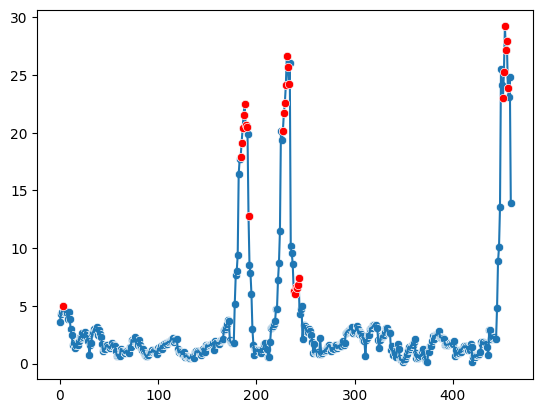

In [38]:
# loop through the target embedding with a sliding window, and make the alignment against every window with length=10
seq1_pcna = 'QGRLDDFFKV'
dpod3_seq = 'MADQLYLENIDEFVTDQNKIVTYKWLSYTLGVHVNQAKQMLYDYVERKRKENSGAQLHVTYLVSGSLIQNGHSCHKVAVVREDKLEAVKSKLAVTASIHVYSIQKAMLKDSGPLFNTDYDILKSNLQNCSKFSAIQCAAAVPRAPAESSSSSKKFEQSHLHMSSETQANNELTTNGHGPPASKQVSQQPKGIMGMFASKAAAKTQETNKETKTEAKEVTNASAAGNKAPGKGNMMSNFFGKAAMNKFKVNLDSEQAVKEEKIVEQPTVSVTEPKLATPAGLKKSSKKAEPVKVLQKEKKRGKRVALSDDETKETENMRKKRRRIKLPESDSSEDEVFPDSPGAYEAESPSPPPPPSPPLEPVPKTEPEPPSVKSSSGENKRKRKRVLKSKTYLDGEGCIVTEKVYESESCTDSEEELNMKTSSVHRPPAMTVKKEPREERKGPKKGTAALGKANRQVSITGFFQRK'

scores_pcna = []
scores_long_pcna = []
for i in range(0, target_embeddings_pcna[single_target_pcna].shape[0] - len(seq1)+1):
  seq2 = dpod3_seq[i:i+len(seq1_pcna)]

  results = extr.embedding_to_span(query_embeddings_pcna[single_query_pcna], target_embeddings_pcna[single_target_pcna][i:i+len(seq1_pcna), :],
                                   result_mode='all')
  row = results[0]

  score = float(round(row['score'].item(), 2))
  scores_pcna.append(score)

  if score >=5 and len(seq1_pcna) == len(seq2):
    #print(seq1_pcna, seq2)
    aln = draw_alignment(row.indices.to_list()[0], seq1_pcna, seq2, output='str')
    query_len = len(aln.split('\n')[0].replace('-', ''))
    target_len = len(aln.split('\n')[2].replace('-', ''))

    if query_len > (len(seq1) - 2) and target_len > (len(seq1) - 2):
      print(aln, query_len, score, i+1, '\n')
      scores_long_pcna.append(score)
    else:
      scores_long_pcna.append(None)
  else:
    scores_long_pcna.append(None)


plt.plot(range(len(scores_pcna)), scores_pcna)
sns.scatterplot(x=range(len(scores_pcna)), y=scores_pcna)
sns.scatterplot(x=range(len(scores_long_pcna)), y=scores_long_pcna, color='red', zorder=3)

ELMI000792 vs DPOD3 alignment with clustalo: https://www.uniprot.org/align/clustalo-R20240408-085430-0847-85470417-p1m/overview
https://www.ebi.ac.uk/jdispatcher/msa/clustalo/summary?jobId=clustalo-I20240408-090159-0187-1814302-p1m


Distribution of plmalign scores in Figure 5:
https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-024-46808-5/MediaObjects/41467_2024_46808_MOESM1_ESM.pdf

These usually align it to another PCNA motif: https://toolkit.tuebingen.mpg.de/tools/msaprobs - but not 100% right